In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

In [2]:
file_path='Part1 - Car-Attributes.json'

In [3]:
with open(file_path, 'r') as f:
    data= json.load(f)

In [4]:
l=len(data)

In [5]:
data[0]

{'mpg': 18,
 'cyl': 8,
 'disp': 307,
 'hp': 130,
 'wt': 3504,
 'acc': 12,
 'yr': 70,
 'origin': 1}

In [6]:
df=[]
for i in range(l):

    mpg=data[i]['mpg']
    cyl=data[i]['cyl']
    disp=data[i]['disp']
    hp=data[i]['hp']
    wt=data[i]['wt']
    acc= data[i]['acc']
    yr=data[i]['yr']
    origin=data[i]['origin']
    df.append([mpg, cyl, disp, hp, wt, acc, yr, origin])

In [7]:
feature_df= pd.DataFrame(df, columns=['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'])
feature_df.shape

(398, 8)

In [8]:
mpg

31

In [9]:
names_df= pd.read_csv('Part1 - Car name.csv')

In [10]:
names_df

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [11]:
df=pd.concat([names_df, feature_df], axis=1)

In [12]:
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [13]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [16]:
df=df[df['hp']!='?']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    object 
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [18]:
df['hp']= df['hp'].astype(int)

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/3706040382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hp']= df['hp'].astype(int)


In [19]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
df['car_name'].unique().shape

(301,)

## Analysing the acceleration and horsepower

In [21]:
df['cyl'].unique()

array([8, 4, 6, 3, 5])

<Axes: xlabel='hp', ylabel='acc'>

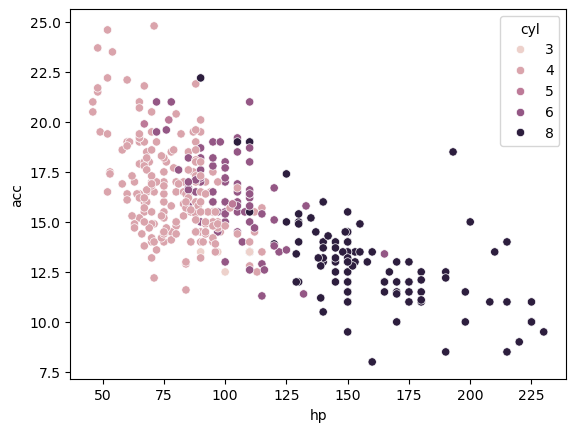

In [22]:
sns.scatterplot(x=df['hp'], y=df['acc'], hue=df['cyl'])

In [23]:
df['acc_hp']= df['acc']/df['hp']

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/3021810947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acc_hp']= df['acc']/df['hp']


In [24]:
# Null Hypothesis: the acc_hp ratio remains same across all values of cyl
# Alterative Hypothesis: the acc_ratio changes between differnet values of cyl

import scipy.stats as stats
grouped_data = df.groupby('cyl')['acc_hp']
print(stats.f_oneway(*[group for name, group in grouped_data]))

F_onewayResult(statistic=103.09649138070174, pvalue=1.1021548101067961e-59)


as pvalue<<0.05, we can reject the null hypothesis
=> the acc_hp ratio changes across different values of cylinder

<Axes: >

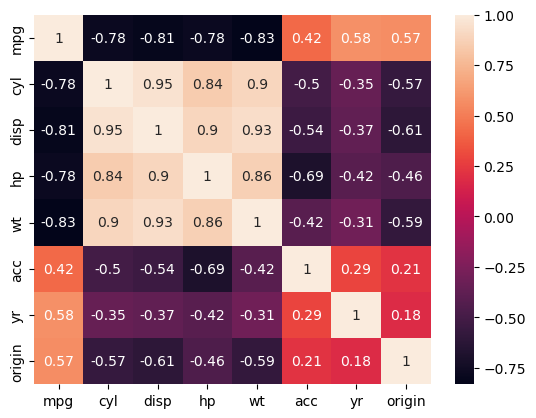

In [25]:
sns.heatmap(df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']].corr(), annot =True)

## Analysing the weight of cars along the years


<Axes: xlabel='yr', ylabel='wt'>

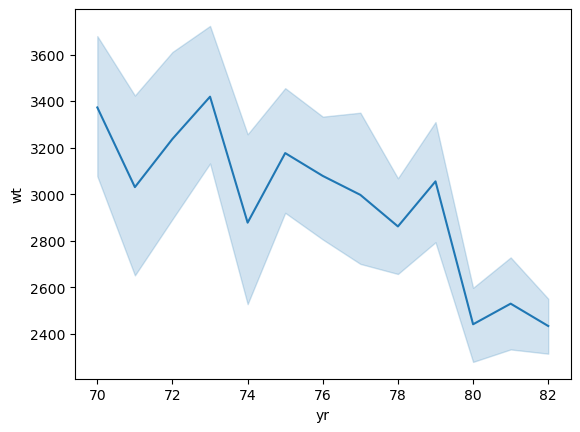

In [26]:
sns.lineplot(x=df['yr'], y=df['wt'])

calculating the average weight of automobiles in interval of 2 years


In [27]:
lst = []

for i in range(70, 82, 2):
    x = df[(df['yr'] >= i) & (df['yr'] <= i + 1)]['wt'].mean()
    lst.append(x)

lst

[3207.8035714285716,
 3344.3676470588234,
 3038.089285714286,
 3041.983870967742,
 2948.153846153846,
 2486.690909090909]

Text(0, 0.5, 'Average Weight')

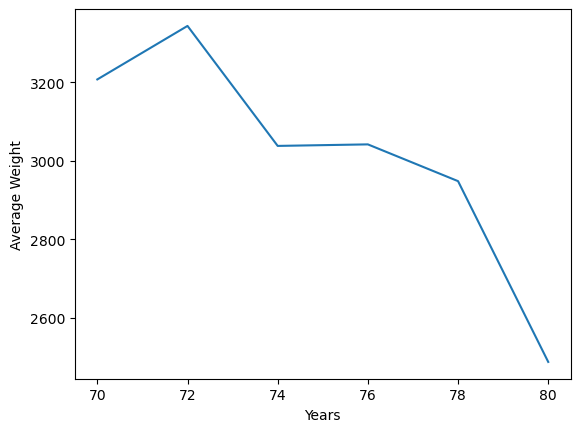

In [28]:
sns.lineplot(x=np.arange(70,82,2), y=lst)
plt.xlabel('Years')
plt.ylabel('Average Weight')

In [29]:
#Null hypothesis: the avg weight of cars remains same over the years
#Alternative hypothesis: the avg weight of cars over the years changes over the years

grouped_data = df.groupby('yr')['wt']
print(stats.f_oneway(*[group for name, group in grouped_data]))

F_onewayResult(statistic=5.063895269022211, pvalue=7.60602438925744e-08)


pvalue<< 0.05, so we reject null hypothesis
=> the avg weight of cars changes over the years

## calculating disp mpg ratio across different origins


In [30]:
df['origin'].unique()

array([1, 3, 2])

<Axes: xlabel='mpg', ylabel='disp'>

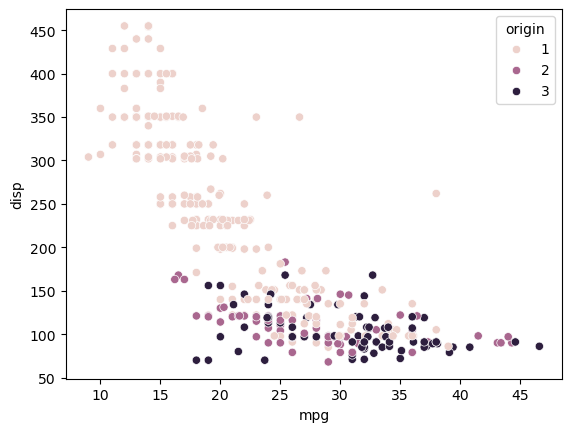

In [31]:
sns.scatterplot(x=df['mpg'], y=df['disp'], hue=df['origin'])

In [32]:
df['disp_mpg_ratio'] = df['disp'] / df['mpg']

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/48313584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disp_mpg_ratio'] = df['disp'] / df['mpg']


In [33]:
#Null hypothesis: disp mpg ratio same for all origins
#Alternative Hypotheses: disp mpg ratio different for all origins

origin_1= df[df['origin']==1]['disp_mpg_ratio']
origin_2= df[df['origin']==2]['disp_mpg_ratio']
origin_3= df[df['origin']==3]['disp_mpg_ratio']

print( stats.f_oneway(origin_1, origin_2, origin_3))

F_onewayResult(statistic=102.66970463486423, pvalue=1.5684898350824963e-36)


as pvalue<< 0.05, we can reject null hypothesis
=> disp mpg ratio differnt for all origins

## KMeans clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
from kneed import KneeLocator

In [36]:
wcss=[]

features = df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
if len(range(1, 11)) == len(wcss):
    knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

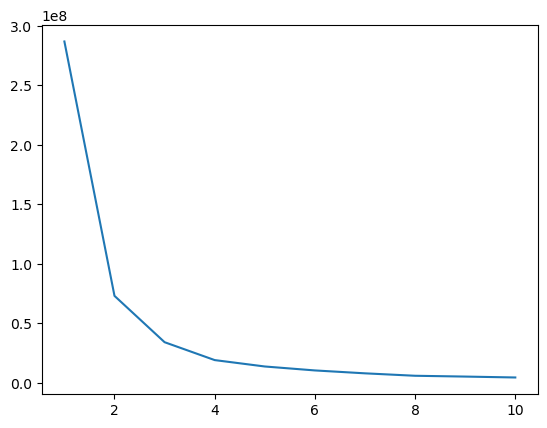

In [37]:
plt.plot(range(1,11), wcss)
plt.show()

In [38]:
knee.knee

3

In [39]:
features = df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]

In [40]:
model= KMeans(n_clusters=3,init='k-means++' )
y_pred= model.fit_predict(features)

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(features, kmeans.labels_)

0.4925859139370679

In [42]:
#Adding a cluster column
df['cluster']= y_pred
df.head()

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/408426572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']= y_pred


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,acc_hp,disp_mpg_ratio,cluster
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0.092308,17.055556,2
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0.069697,23.333333,2
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0.073333,17.666667,2
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0.080000,19.000000,2
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,0.075000,17.764706,2


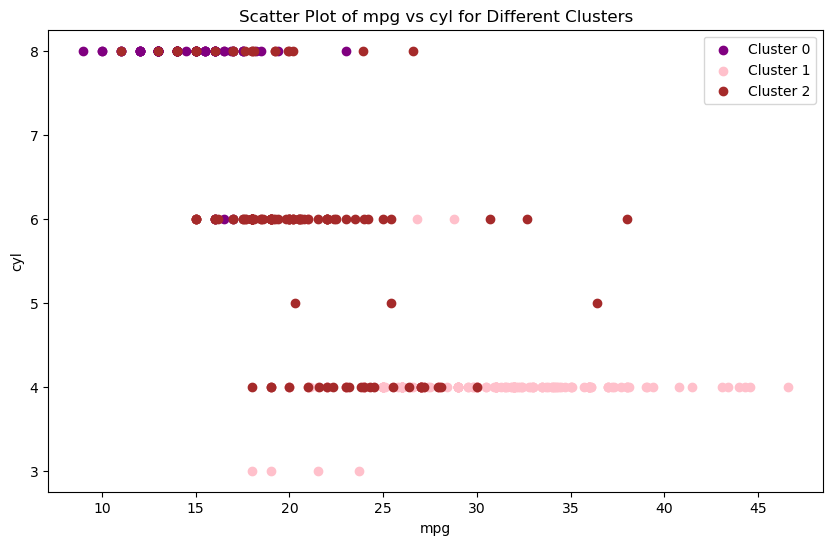

In [43]:
df1= df[df['cluster']==0]
df2= df[df['cluster']==1]
df3= df[df['cluster']==2]
features = df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]

plt.figure(figsize=(10, 6))
plt.scatter(df1['mpg'], df1['cyl'], color='purple', label='Cluster 0')
plt.scatter(df2['mpg'], df2['cyl'], color='pink', label='Cluster 1')
plt.scatter(df3['mpg'], df3['cyl'], color='brown', label='Cluster 2')

plt.xlabel('mpg')
plt.ylabel('cyl')
plt.title('Scatter Plot of mpg vs cyl for Different Clusters')
plt.legend()
plt.show()

<Figure size 3000x3000 with 0 Axes>

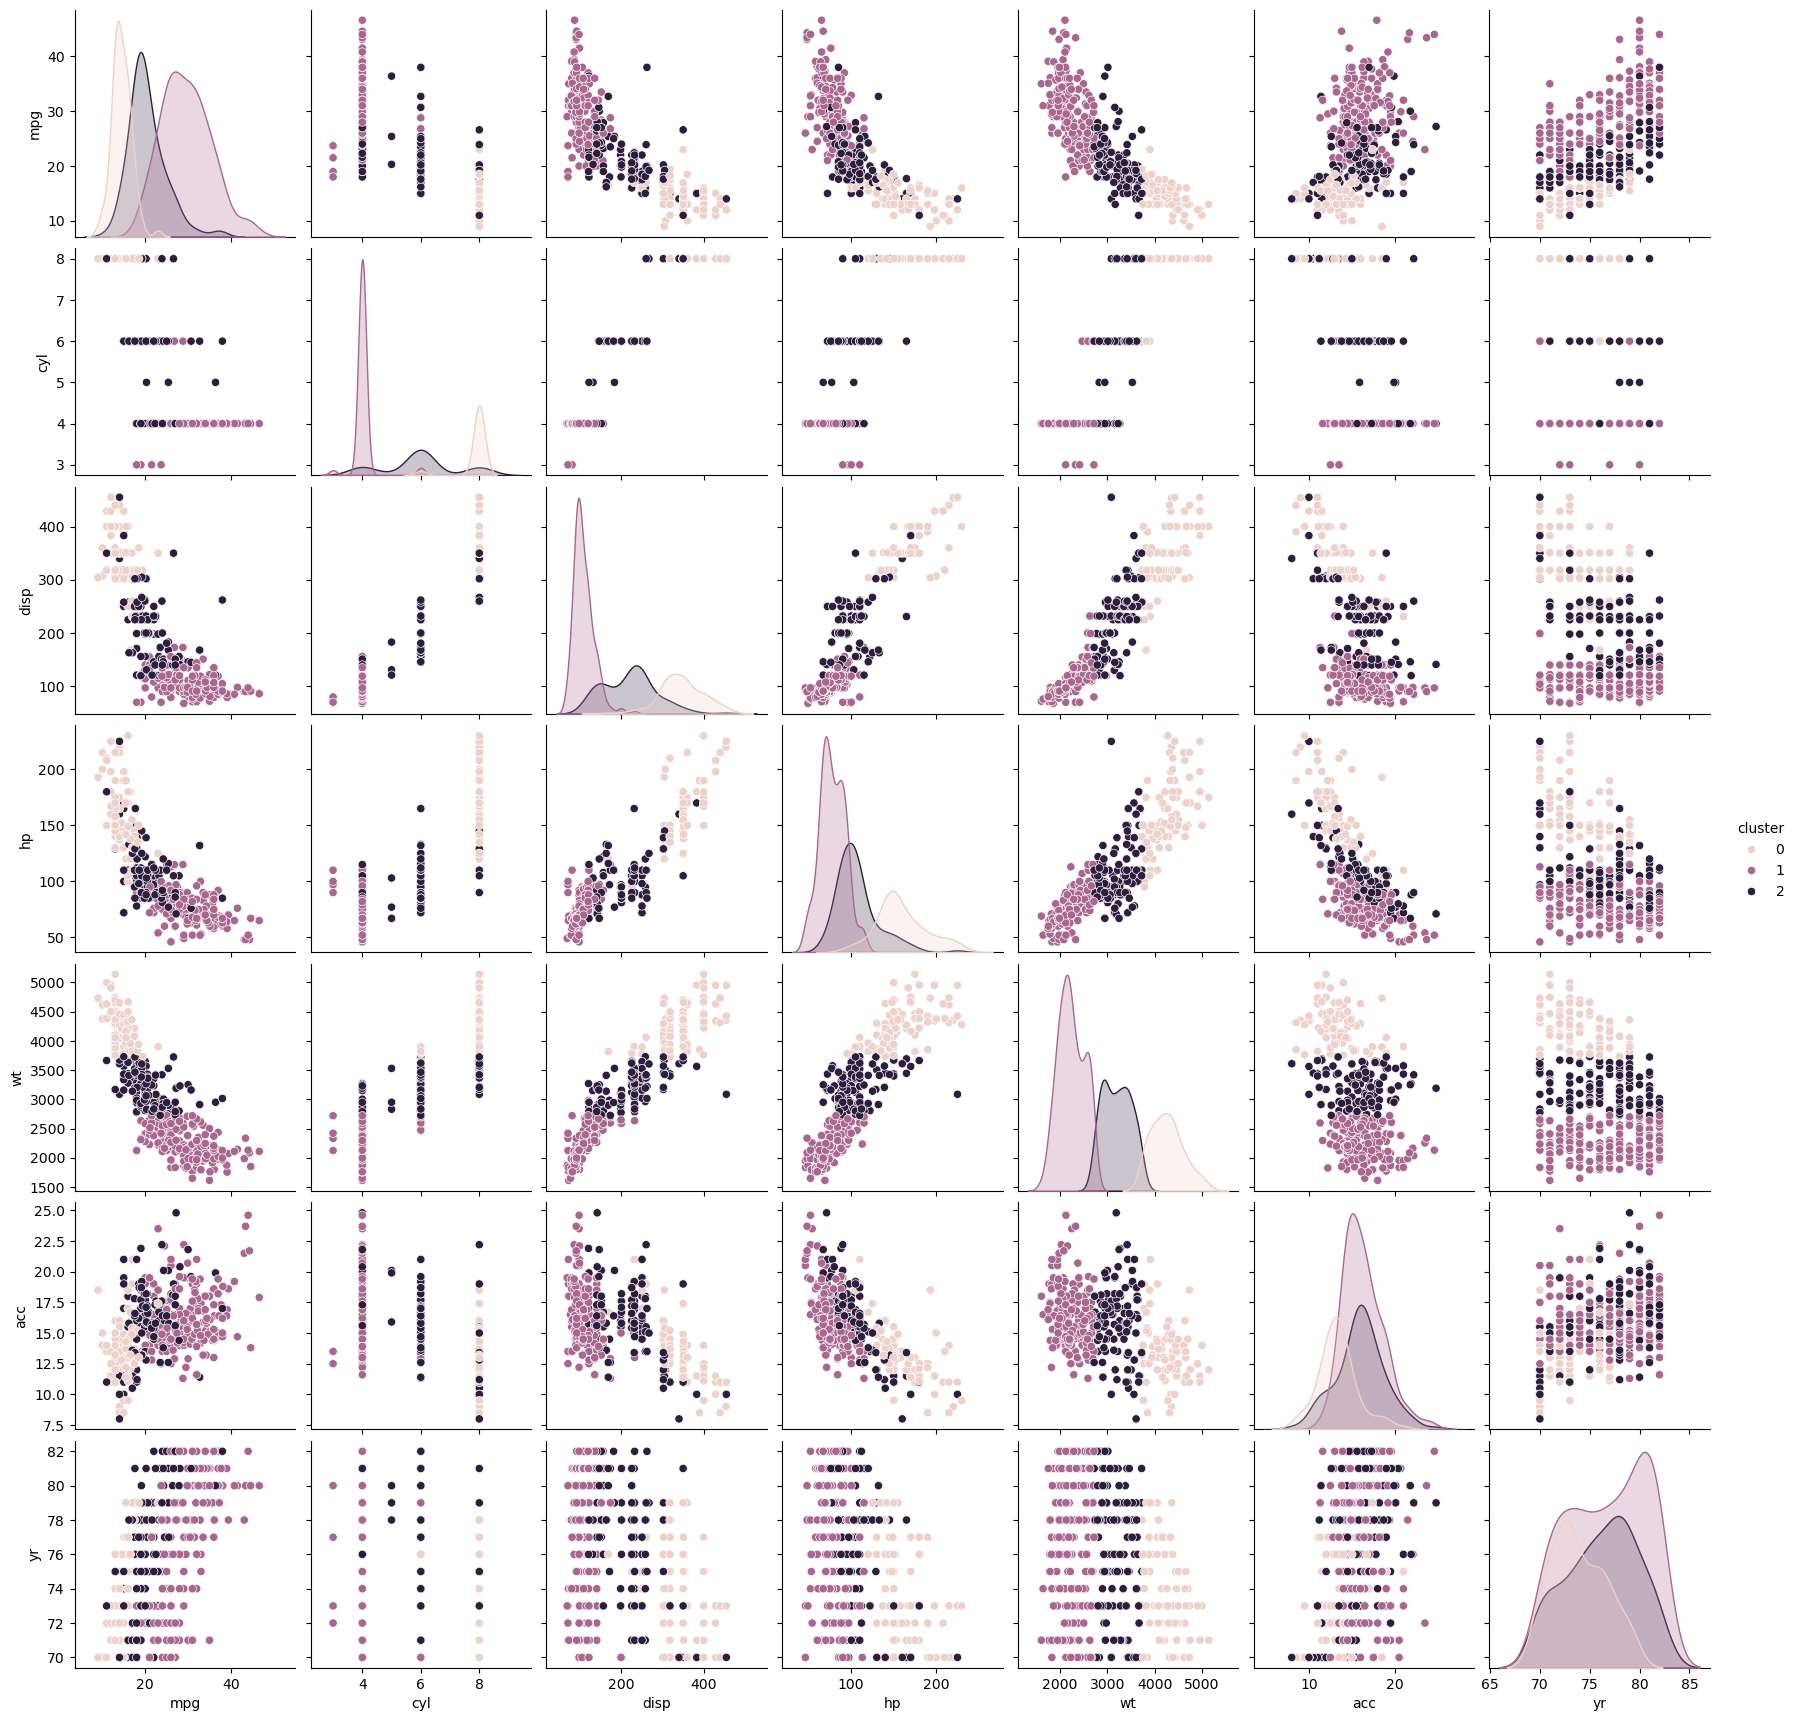

In [44]:
plt.figure(figsize=(30,30))
sns.pairplot(df, hue='cluster', vars=['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])
plt.show()

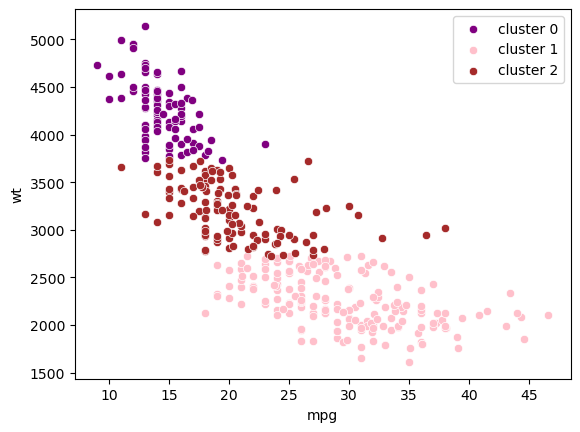

In [45]:
sns.scatterplot(x=df1['mpg'],y= df1['wt'], color='purple', label='cluster 0')
sns.scatterplot(x=df2['mpg'],y= df2['wt'], color='pink', label='cluster 1')
sns.scatterplot(x=df3['mpg'],y= df3['wt'], color='brown', label='cluster 2')

plt.legend()
plt.show()


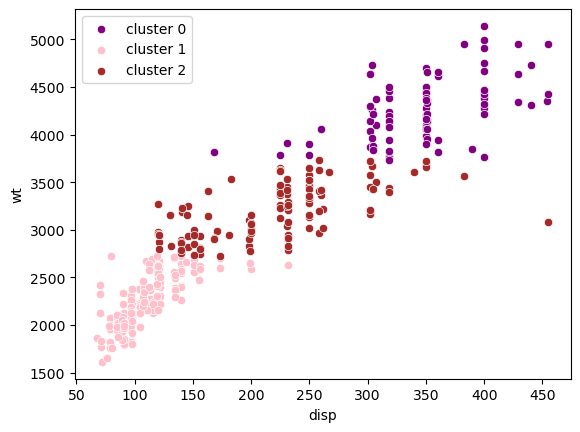

In [46]:
sns.scatterplot(x=df1['disp'],y= df1['wt'], color='purple', label='cluster 0')
sns.scatterplot(x=df2['disp'],y= df2['wt'], color='pink', label='cluster 1')
sns.scatterplot(x=df3['disp'],y= df3['wt'], color='brown', label='cluster 2')

plt.legend()
plt.show()


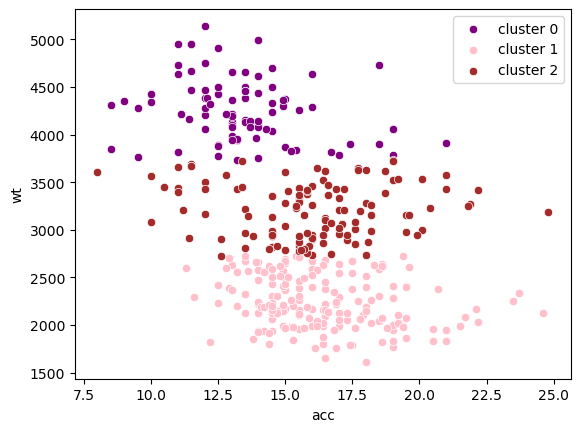

In [47]:
sns.scatterplot(x=df1['acc'],y= df1['wt'], color='purple', label='cluster 0')
sns.scatterplot(x=df2['acc'],y= df2['wt'], color='pink', label='cluster 1')
sns.scatterplot(x=df3['acc'],y= df3['wt'], color='brown', label='cluster 2')

plt.legend()
plt.show()


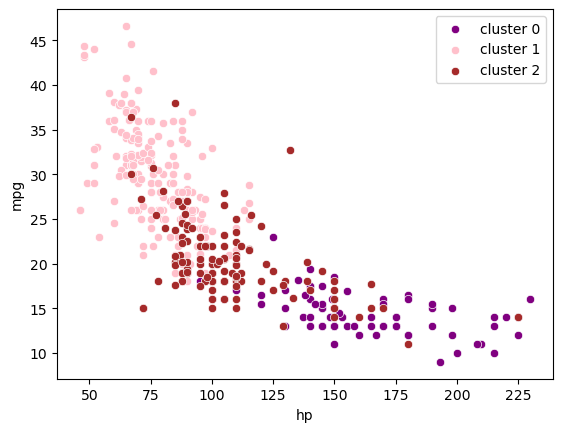

In [48]:
sns.scatterplot(y=df1['mpg'],x= df1['hp'], color='purple', label='cluster 0')
sns.scatterplot(y=df2['mpg'],x= df2['hp'], color='pink', label='cluster 1')
sns.scatterplot(y=df3['mpg'],x= df3['hp'], color='brown', label='cluster 2')

plt.legend()
plt.show()


## Hierarchial Clustering

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']

df_scaled = scaler.fit_transform(df[features])

# Convert scaled array back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)
df_scaled

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [50]:
import scipy.cluster.hierarchy as sc

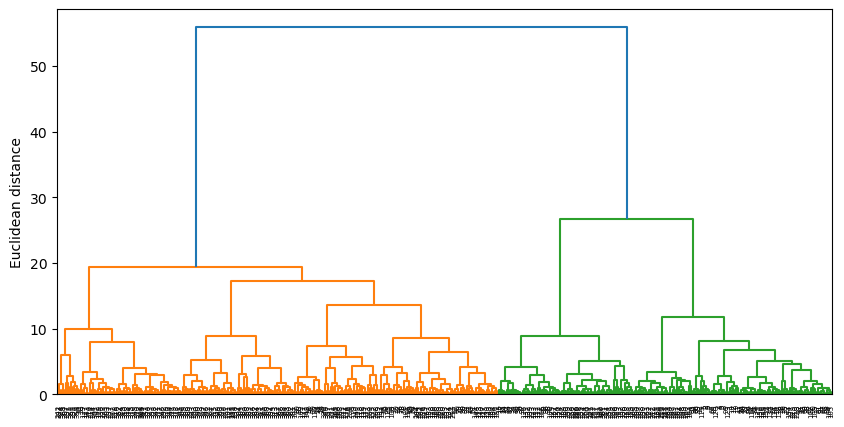

In [51]:
plt.figure(figsize=(10,5))
sc.dendrogram(sc.linkage(df_scaled, method='ward'))

plt.ylabel('Euclidean distance')
plt.show()

using 2 clusters as seen from dendrogram

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2,  linkage='ward')
cluster_labels = cluster.fit_predict(df_scaled)                     
df['cluster_labels'] = cluster_labels       #Adding cluster_labels, i.e. labels from hierarchial clustering

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/4064482339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_labels'] = cluster_labels       #Adding cluster_labels, i.e. labels from hierarchial clustering


In [53]:
silhouette_score(df_scaled, cluster_labels)

0.4128340172269588

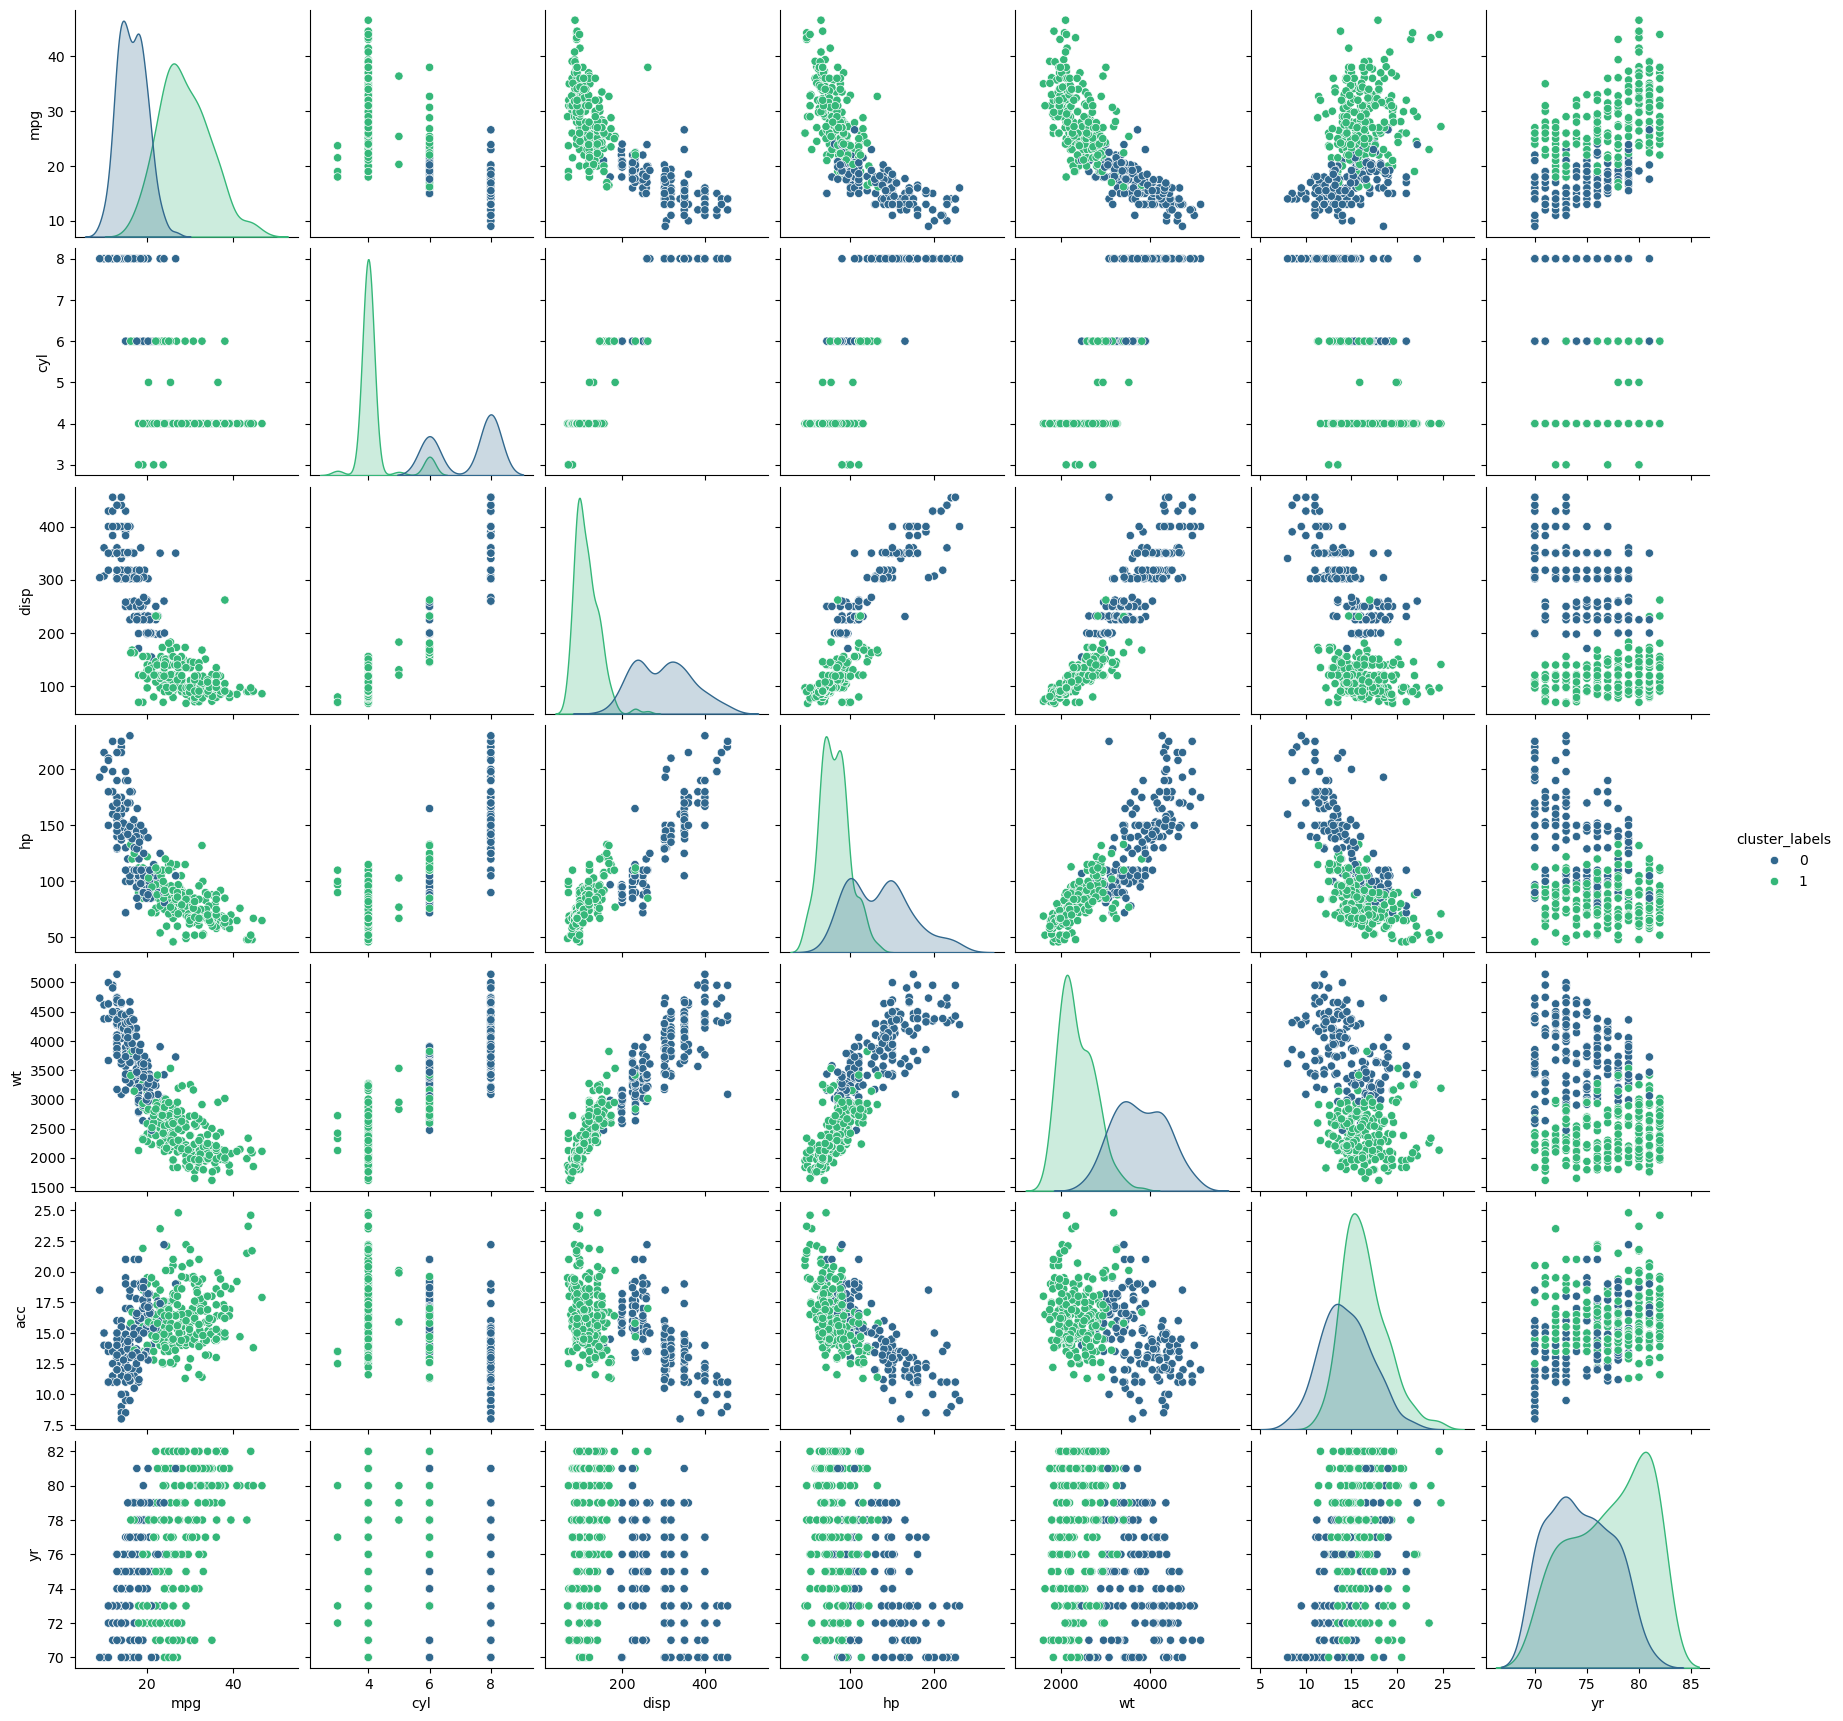

In [54]:
# Use seaborn pair plot to visualize clusters across multiple features
sns.pairplot(df, hue='cluster_labels', palette='viridis',  vars=['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])

plt.show()

In [55]:
df['cluster_labels'].unique()

array([0, 1])

KMeans- 0.49189396891644294  , 3 Clusters




Hierarchial- 0.4128340172269588 ,  2 Clusters

using 3 clusters is providing better silhoutte score

## Using Linear Regression Model (without clusters)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [57]:
df.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin',
       'acc_hp', 'disp_mpg_ratio', 'cluster', 'cluster_labels'],
      dtype='object')

In [58]:
X = df[['car_name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]
y= df['mpg']

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['car_name'] = label_encoder.fit_transform(X['car_name'])

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/554935961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['car_name'] = label_encoder.fit_transform(X['car_name'])


In [60]:
X

,car_name,cyl,disp,hp,wt,acc,yr,origin
0,48,8,307.0,130,3504,12.0,70,1
1,35,8,350.0,165,3693,11.5,70,1
2,229,8,318.0,150,3436,11.0,70,1
3,13,8,304.0,150,3433,12.0,70,1
4,159,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,151,4,140.0,86,2790,15.6,82,1
394,297,4,97.0,52,2130,24.6,82,2
395,118,4,135.0,84,2295,11.6,82,1
396,157,4,120.0,79,2625,18.6,82,1


In [61]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [62]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

x_test_scaled= scaler.transform(x_test)

In [63]:
linear_model= LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [64]:
y_pred= linear_model.predict(x_test_scaled)

In [65]:
from sklearn import metrics
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Coefficients", linear_model.coef_)

MSE 11.97555493216222
RMSE 3.4605714747946212
MAE 2.8439262780714567
Coefficients [ 0.27452749 -0.23950154  1.79883993 -0.5193273  -5.69617307  0.32101328
  2.88612369  1.172181  ]


## Linear regression (using 3 Clusters)

In [66]:
#Cluster 1
df1= df[df['cluster']==0]

In [67]:
X = df1[['car_name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]
y= df1['mpg']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['car_name'] = label_encoder.fit_transform(X['car_name'])

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/2403674350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['car_name'] = label_encoder.fit_transform(X['car_name'])


In [68]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [69]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

x_test_scaled= scaler.transform(x_test)

In [70]:
linear_model= LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [71]:
y_pred= linear_model.predict(x_test_scaled)

In [72]:
from sklearn import metrics
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Coefficients", linear_model.coef_)

MSE 2.039948600423058
RMSE 1.4282676921442485
MAE 1.089073608774131
Coefficients [ 0.07841271 -0.39495406  1.01944322 -0.77931992 -0.82181431 -0.02499302
  1.1681028   0.09288842]


In [73]:
#Cluster 2
df2= df[df['cluster']==1]

In [74]:
X = df2[['car_name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]
y= df2['mpg']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['car_name'] = label_encoder.fit_transform(X['car_name'])

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/630395843.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['car_name'] = label_encoder.fit_transform(X['car_name'])


In [75]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [76]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

x_test_scaled= scaler.transform(x_test)

In [77]:
linear_model= LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [78]:
y_pred= linear_model.predict(x_test_scaled)

In [79]:
from sklearn import metrics
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Coefficients", linear_model.coef_)

MSE 11.624174439963594
RMSE 3.4094243560993687
MAE 2.3307248138237826
Coefficients [ 0.2386792   0.84749868 -0.73797835 -1.1107059  -1.62042643 -0.01991621
  3.51834696  0.08740722]


In [80]:
#Cluster 3
df3= df[df['cluster']==2]

In [81]:
X = df3[['car_name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]
y= df3['mpg']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['car_name'] = label_encoder.fit_transform(X['car_name'])

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_83337/1766947605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['car_name'] = label_encoder.fit_transform(X['car_name'])


In [82]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [83]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

x_test_scaled= scaler.transform(x_test)

In [84]:
linear_model= LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [85]:
y_pred= linear_model.predict(x_test_scaled)

In [86]:
from sklearn import metrics
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Coefficients", linear_model.coef_)

MSE 9.78062105663226
RMSE 3.1273984486522117
MAE 2.0052214439172817
Coefficients [ 0.35925415 -1.26784044  1.94061573 -1.56064092 -1.17038477 -0.76223494
  2.59483631  0.93326348]
